In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D4-Allyson/S3/Office_Allyson-S3.csv",index_col='timestamp')

In [ ]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [ ]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [ ]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [ ]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [ ]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [ ]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [ ]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (5736, 24, 1)
y_train.shape =  (5736,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [ ]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [ ]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48)               4992      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [26]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="MSE")

In [27]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
45/45 [==============================] - 3s 13ms/step - loss: 6.6644
Epoch 2/300
45/45 [==============================] - 1s 14ms/step - loss: 5.4861
Epoch 3/300
45/45 [==============================] - 1s 14ms/step - loss: 5.5456
Epoch 4/300
45/45 [==============================] - 1s 14ms/step - loss: 6.0365
Epoch 5/300
45/45 [==============================] - 1s 14ms/step - loss: 5.6773
Epoch 6/300
45/45 [==============================] - 1s 14ms/step - loss: 5.3562
Epoch 7/300
45/45 [==============================] - 1s 14ms/step - loss: 5.3745
Epoch 8/300
45/45 [==============================] - 1s 14ms/step - loss: 5.6251
Epoch 9/300
45/45 [==============================] - 1s 14ms/step - loss: 5.5027
Epoch 10/300
45/45 [==============================] - 1s 14ms/step - loss: 5.4850
Epoch 11/300
45/45 [==============================] - 1s 14ms/step - loss: 5.3649
Epoch 12/300
45/45 [==============================] - 1s 14ms/step - loss: 5.5523
Epoch 13/300
45/45 [=====

In [28]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [30]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 1.8517543125752147
RMSE for BiLSTM Model for testing is: 1.3758068589164778
MAE for BiLSTM Model for training is: 1.0127123433210194
MAE for BiLSTM Model for testing is: 0.9215383620097718
MAPE for BiLSTM Model for training is: 0.052821731611623804
MAPE for BiLSTM Model for testing is: 0.053568730668919234


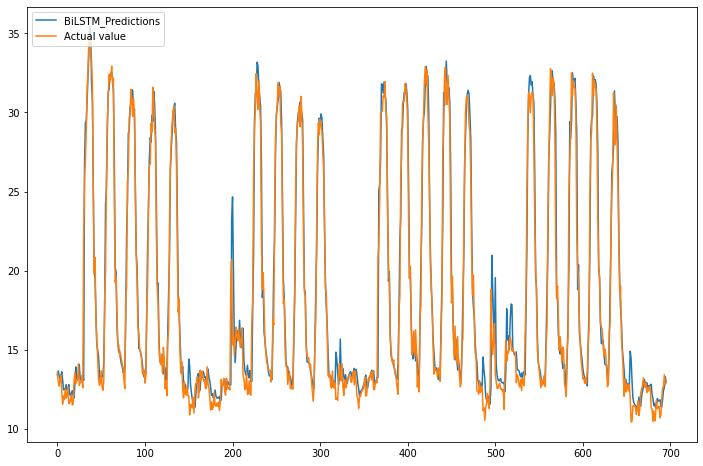

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([13.54]), array([13.390306], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.14969353]), array([-0.68214348]), array([-0.67919785]), array([0.0471331]), array([0.09175362]), array([-1.22800625]), array([-1.52411289]), array([-0.38837784]), array([-0.66767612]), array([0.08059956]), array([-0.86016685]), array([-0.36598293]), array([0.22165146]), array([-1.19484535]), array([-0.60726036]), array([-0.23397602]), array([-0.14189949]), array([-0.90861607]), array([-0.53683228]), array([1.05202148]), array([0.75692898]), array([-1.04515232]), array([-0.06957237]), array([-0.10637756]), array([0.93760548]), array([-1.34272148]), array([-0.29960785]), array([-0.07776669]), array([0.23723541]), array([-0.89889328]), array([8.8867268]), array([-0.7730883]), array([-2.40456108]), array([-0.5018232]), array([0.66669655]), array([0.3819223]), array([1.10505356]), array([-1.00587662]), array([-1.53992538]), array([1.49335106]), array([0.96334877]), array([-0.50880348]), array([0.01956139]), array([1.27977188]), array([-0.29139908]), array([0.27325996]), array([-0.

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([8.8867268]), array([-9.35958595]))

In [ ]:
max(d1)-min(d1)

array([18.24631275])

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(443, 253)